In [225]:
# Libraries and utilities

import math
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pylab as pl

from collections import defaultdict
from scipy.stats import pearsonr


import pandas as pd

import os

# Nome del file
file_name = "df_clean.csv"

# Percorso relativo della cartella genitore
cartella_genitore = ".."

# Creazione del percorso completo
percorso_completo = os.path.join(cartella_genitore, file_name)

# Leggi il file CSV
df = pd.read_csv(percorso_completo)

print(df.head())

                                   name  duration_ms  explicit  popularity  \
0                             Long Road       241760     False          46   
1  Daniâl My Son, Where Did You Vanish?       444000     False           0   
2                    Ondskapens Galakse       333506     False           3   
3                       Can't Look Away       269800     False          23   
4                         Thunderground       307651     False          25   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex         0.690   0.513    5   
1           Siavash Amini    A Trail of Laughters         0.069   0.196    1   
2               Kvelertak              Nattesferd         0.363   0.854    2   
3       The Wood Brothers       One Drop of Truth         0.523   0.585    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100         0.643   0.687    7   

   loudness  ...  liveness  valence    tempo  feat

In [226]:
numero_di_elementi = df.shape[0]

print(f"Il numero di elementi nel dataset è: {numero_di_elementi}")

Il numero di elementi nel dataset è: 14527


In [227]:
column2drop = ['explicit', 'artists', 'album_name','name']
df.drop(column2drop, axis=1, inplace=True)
df.head()
columns_of_interest = ['duration_ms','genre','acousticness', 'instrumentalness', 'loudness', 'valence', 'danceability', 'energy', 'n_beats','time_signature','popularity','liveness','tempo','processing','speechiness']
 
# Crea un nuovo DataFrame utilizzando solo le colonne di interesse
df = df[columns_of_interest].copy()
# Supponiamo che tu voglia dividere i valori della colonna 'nome_colonna' per 3600
df['duration_ms'] = df['duration_ms'] / 3600

In [228]:
#df_clus.drop(5695, inplace=True)

In [229]:
df.head()


duration_ms        genre  acousticness  instrumentalness  loudness  \
0    67.155556      j-dance      0.302000           0.53600   -12.529   
1   123.333333      iranian      0.283000           0.93400   -24.801   
2    92.640556  black-metal      0.000089           0.80000    -7.445   
3    74.944444    bluegrass      0.066400           0.00127    -5.607   
4    85.458611        happy      0.000576           0.09690   -11.340   

   valence  danceability  energy  n_beats  time_signature  popularity  \
0   0.6350         0.690   0.513    567.0             4.0          46   
1   0.0336         0.069   0.196    617.0             4.0           0   
2   0.4890         0.363   0.854    652.0             4.0           3   
3   0.3850         0.523   0.585    619.0             4.0          23   
4   0.6370         0.643   0.687    733.0             4.0          25   

   liveness    tempo  processing  speechiness  
0     0.281  142.221    1.279305       0.0975  
1     0.360   75.596    2.367412       0.0805  
2     0.262  116.628    3.700483       0.0397  
3     0.117  140.880    1.279305       0.0765  
4     0.299  143.956    4.067086       0.0539

In [230]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df, columns=['genre'])
df = pd.get_dummies(df, columns=['time_signature'])
min_value = df['popularity'].min()
max_value = df['popularity'].max()

# Crea gli intervalli (bins)
bins = [min_value, min_value + (max_value - min_value) / 5, min_value + 2 * (max_value - min_value) / 5,
            min_value + 3 * (max_value - min_value) / 5, min_value + 4 * (max_value - min_value) / 5, max_value]

# Etichette per gli intervalli
labels = ["Intervallo 1", "Intervallo 2", "Intervallo 3", "Intervallo 4", "Intervallo 5"]

# Aggiungi una nuova colonna al DataFrame che indica l'intervallo per ciascun valore nella colonna di interesse
df['intervalli'] = pd.cut(df['popularity'], bins=bins, labels=labels, include_lowest=True)

from sklearn.model_selection import train_test_split
attributes = [col for col in df.columns if col not in ['intervalli','popularity']]
X = df[attributes].values
Y = df['intervalli']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [231]:
import pandas as pd

# Assuming Y is a pandas Series representing the target variable
class_distribution = pd.Series(Y).value_counts()

# Stampare la distribuzione delle classi
print("Distribuzione delle classi:")
print(class_distribution)

# Trovare le classi con un solo membro
classes_with_one_member = class_distribution[class_distribution == 1]

# Stampare le classi con un solo membro
print("\nClassi con un solo membro:")
print(classes_with_one_member)


Distribuzione delle classi:
Intervallo 2    5128
Intervallo 1    4942
Intervallo 3    3387
Intervallo 4     999
Intervallo 5      71
Name: intervalli, dtype: int64

Classi con un solo membro:
Series([], Name: intervalli, dtype: int64)


In [232]:
# Assuming Y is a pandas Series representing the target variable
class_distribution = pd.Series(Y).value_counts()

# Trovare le classi con un solo membro
classes_with_one_member = class_distribution[class_distribution == 1]

# Stampa gli elementi della classe con un solo membro
for class_label in classes_with_one_member.index:
    indices_in_class = Y[Y == class_label].index
    elements_in_class = df.loc[indices_in_class]
    print(f"Elementi nella classe {class_label}:")
    print(elements_in_class)
    print("\n")


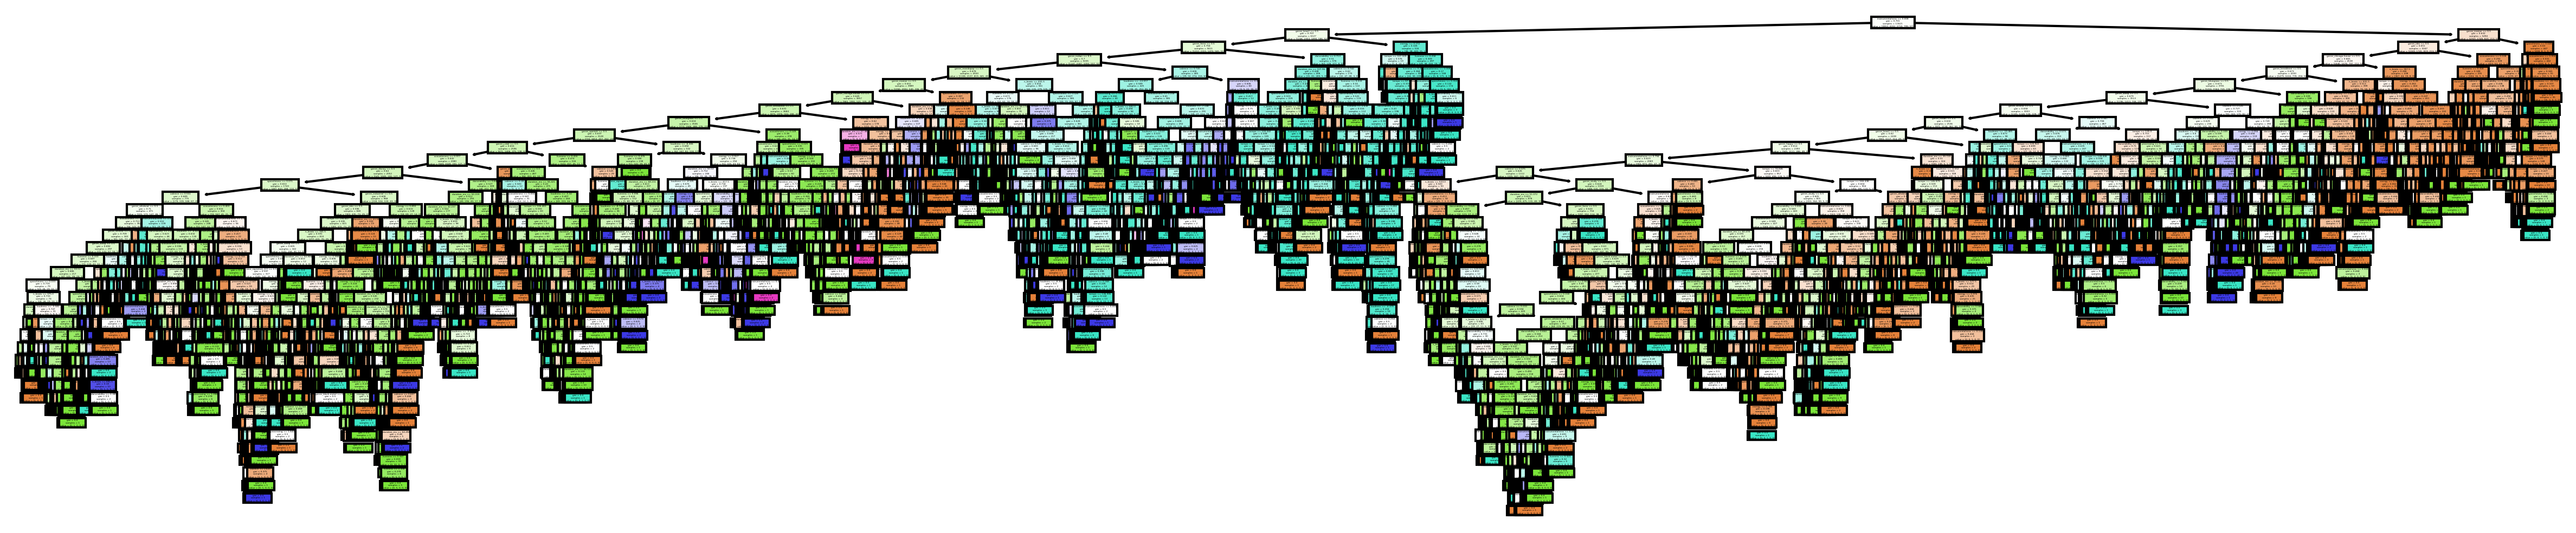

In [233]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.show()

In [234]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))
print(classification_report(y_test, y_test_pred))
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

Train Accuracy 0.9972463643404182
Train F1-score [0.99810486 0.99695382 0.9970447  0.99560578 0.99115044]

Test Accuracy 0.5058499655884378
Test F1-score [0.58793715 0.50392157 0.49479941 0.19477435 0.125     ]
              precision    recall  f1-score   support

Intervallo 1       0.59      0.59      0.59       989
Intervallo 2       0.51      0.50      0.50      1026
Intervallo 3       0.50      0.49      0.49       677
Intervallo 4       0.19      0.20      0.19       200
Intervallo 5       0.11      0.14      0.12        14

    accuracy                           0.51      2906
   macro avg       0.38      0.39      0.38      2906
weighted avg       0.51      0.51      0.51      2906

instrumentalness 0.09910908671287846
acousticness 0.07295651074808128
loudness 0.0704083738156919
danceability 0.06996871169012608
speechiness 0.06782706437911915
duration_ms 0.0660921956010322
valence 0.06572442946481068
liveness 0.065353354353366
tempo 0.062012642916348455
energy 0.060821711789741

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Crea e addestra il modello
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Esegui predizioni
predictions = rf_classifier.predict(X_test)

# Valuta il modello
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, predictions)
print(report)

# Visualizza l'importanza delle feature
feature_importance = rf_classifier.feature_importances_
print("Feature Importance:")
for feature, importance in zip(attributes, feature_importance):
    print(f"{feature}: {importance:.4f}")


Accuracy: 0.62
              precision    recall  f1-score   support

Intervallo 1       0.68      0.66      0.67       989
Intervallo 2       0.57      0.70      0.63      1026
Intervallo 3       0.62      0.57      0.60       677
Intervallo 4       0.47      0.14      0.22       200
Intervallo 5       0.00      0.00      0.00        14

    accuracy                           0.62      2906
   macro avg       0.47      0.42      0.42      2906
weighted avg       0.61      0.62      0.61      2906

Feature Importance:
duration_ms: 0.0681
acousticness: 0.0685
instrumentalness: 0.0805
loudness: 0.0690
valence: 0.0669
danceability: 0.0661
energy: 0.0677
n_beats: 0.0634
liveness: 0.0620
tempo: 0.0640
processing: 0.0410
speechiness: 0.0671
genre_afrobeat: 0.0049
genre_black-metal: 0.0026
genre_bluegrass: 0.0141
genre_brazil: 0.0283
genre_breakbeat: 0.0088
genre_chicago-house: 0.0151
genre_disney: 0.0049
genre_forro: 0.0155
genre_happy: 0.0042
genre_idm: 0.0157
genre_indian: 0.0172
genre_ind

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from itertools import product




# Supponiamo che tu abbia già diviso il dataset in X (features) e Y (target)

# Definisci le combinazioni di parametri da testare
criterions = ['gini', 'entropy']
max_depths = [2, 5, 10, 15, None]
min_samples_splits = [2, 5, 10, 20]

# Itera su tutte le combinazioni di parametri
for criterion, max_depth, min_samples_split in product(criterions, max_depths, min_samples_splits):
    # Crea il classificatore con i parametri correnti
    classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

    # Esegui la cross-validation
    cross_val_results = cross_val_score(classifier, X, Y, cv=8, scoring='accuracy')

    # Stampa i risultati
    print(f"Criterion: {criterion}, Max Depth: {max_depth}, Min Samples Split: {min_samples_split}")
    print("Accuracy: %.2f%% (+/- %.2f%%)" % (cross_val_results.mean() * 100, cross_val_results.std() * 200))
    print()


Criterion: gini, Max Depth: 2, Min Samples Split: 2
Accuracy: 46.73% (+/- 1.41%)

Criterion: gini, Max Depth: 2, Min Samples Split: 5
Accuracy: 46.73% (+/- 1.41%)

Criterion: gini, Max Depth: 2, Min Samples Split: 10
Accuracy: 46.73% (+/- 1.41%)

Criterion: gini, Max Depth: 2, Min Samples Split: 20
Accuracy: 46.73% (+/- 1.41%)

Criterion: gini, Max Depth: 5, Min Samples Split: 2
Accuracy: 55.07% (+/- 1.49%)

Criterion: gini, Max Depth: 5, Min Samples Split: 5
Accuracy: 55.06% (+/- 1.51%)

Criterion: gini, Max Depth: 5, Min Samples Split: 10
Accuracy: 55.06% (+/- 1.51%)

Criterion: gini, Max Depth: 5, Min Samples Split: 20
Accuracy: 55.09% (+/- 1.52%)

Criterion: gini, Max Depth: 10, Min Samples Split: 2
Accuracy: 56.81% (+/- 1.69%)

Criterion: gini, Max Depth: 10, Min Samples Split: 5
Accuracy: 56.90% (+/- 1.63%)

Criterion: gini, Max Depth: 10, Min Samples Split: 10
Accuracy: 57.00% (+/- 1.58%)

Criterion: gini, Max Depth: 10, Min Samples Split: 20
Accuracy: 57.20% (+/- 1.83%)

Criter

In [237]:
#Per trovare il miglior learning rate, puoi utilizzare tecniche di ricerca, ad esempio l'approccio
#di "learning rate range test". Durante questo test, aumenterai gradualmente il learning rate e monitorerai la 
#funzione di loss, cercando il punto in cui la loss inizia a salire. 
#Quel punto può indicare che il learning rate è diventato troppo grande.
#Nel grafico, cerca il punto in cui la log loss è ancora bassa, ma inizia a salire.
#Questo può essere un buon indicatore di un learning rate appropriato per il tuo problema.

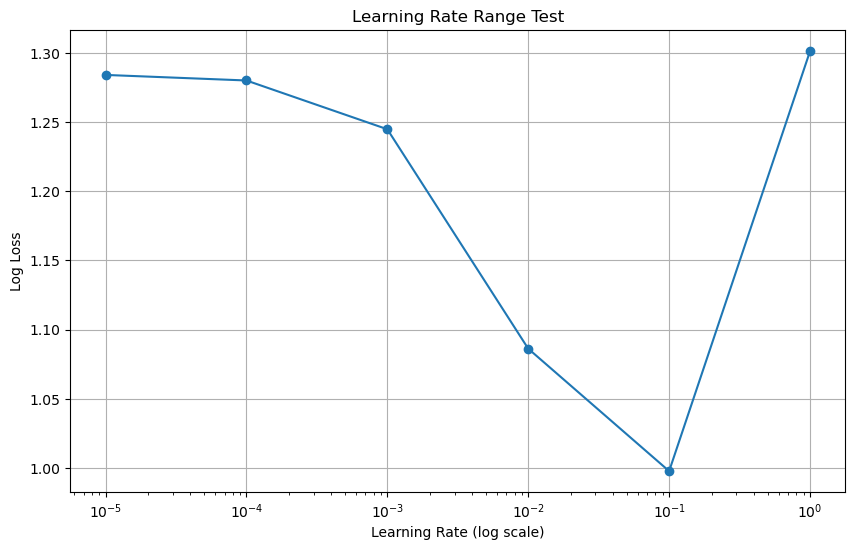

In [238]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import tensorflow as tf

# Carica il tuo dataset o usa un dataset di esempio
# X, y = ...

# Suddividi il dataset in training e validation set
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inizializza un modello Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Valori di learning rate da testare
learning_rates = [10**i for i in range(-5, 1)]

# Liste per salvare i risultati
losses = []

# Testa diversi learning rates
for lr in learning_rates:
    gb_model.set_params(learning_rate=lr)
    gb_model.fit(X_train, y_train)
    y_pred_proba = gb_model.predict_proba(X_val)
    loss = log_loss(y_val, y_pred_proba)
    losses.append(loss)

# Plot del learning rate test
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, losses, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Log Loss')
plt.title('Learning Rate Range Test')
plt.grid(True)
plt.show()


In [239]:
#Questo script utilizza la StratifiedKFold e varia il numero di fold da 3 a 10. 
#Puoi adattare l intervallo in base alle tue esigenze. Valuta i risultati e osserva 
#come cambiano le prestazioni al variare del numero di fold. Ricerca il numero di fold 
#che fornisce una buona stima delle prestazioni del modello senza richiedere troppo tempo di calcolo.

In [240]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Supponiamo che tu abbia già diviso il dataset in X (features) e Y (target)

# Definisci il classificatore (usando il RandomForest come esempio)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Prova con diversi numeri di fold
for num_folds in range(3, 11):  # Puoi regolare l'intervallo a tuo piacimento
    # Definisci StratifiedKFold con il numero corrente di fold
    stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Esegui la cross-validation
    cross_val_results = cross_val_score(classifier, X, Y, cv=stratified_kfold, scoring='accuracy')

    # Stampa i risultati
    print(f"Numero di Fold: {num_folds}, Accuracy Media: {cross_val_results.mean() * 100:.2f}% (+/- {cross_val_results.std() * 200:.2f}%)")


Numero di Fold: 3, Accuracy Media: 60.61% (+/- 0.96%)
Numero di Fold: 4, Accuracy Media: 61.50% (+/- 1.40%)
Numero di Fold: 5, Accuracy Media: 61.38% (+/- 1.36%)
Numero di Fold: 6, Accuracy Media: 61.18% (+/- 1.31%)
Numero di Fold: 7, Accuracy Media: 61.73% (+/- 2.12%)
Numero di Fold: 8, Accuracy Media: 61.35% (+/- 1.97%)
Numero di Fold: 9, Accuracy Media: 61.17% (+/- 2.19%)
Numero di Fold: 10, Accuracy Media: 61.42% (+/- 1.80%)


In [241]:
#Per trovare il valore ottimale per il parametro max_depth in un modello di albero decisionale,
#puoi utilizzare una tecnica chiamata "grid search" o "random search" in combinazione con la
#validazione incrociata (cross-validation). La grid search esplora sistematicamente una griglia
#di valori del parametro, mentre la random search seleziona casualmente combinazioni di parametri.

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Carica il tuo dataset
# X, y = ...

# Suddividi il dataset in set di training e validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definisci il modello Decision Tree
dt_classifier = DecisionTreeClassifier()

# Definisci la griglia dei parametri da esplorare
param_grid = {'max_depth': [3, 5, 7, 10, 13, 16, None]}  # Aggiungi altri valori se necessario

# Configura la GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)  # cv è il numero di fold di cross-validation

# Esegui la grid search sul set di training
grid_search.fit(X_train, y_train)

# Ottieni il miglior modello e i relativi parametri
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Valuta il modello sul set di validation
accuracy_val = best_model.score(X_val, y_val)

print(f"Miglior modello: {best_model}")
print(f"Parametri ottimali: {best_params}")
print(f"Accuratezza sul set di validation: {accuracy_val}")


Miglior modello: DecisionTreeClassifier(max_depth=7)
Parametri ottimali: {'max_depth': 7}
Accuratezza sul set di validation: 0.5650378527185134


In [243]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Supponiamo che tu abbia già il tuo dataset diviso in feature (X) e target (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creare un modello di Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)

# Addestrare il modello sul set di addestramento
gb_classifier.fit(X_train, y_train)

# Effettuare previsioni sul set di test
predictions = gb_classifier.predict(X_test)

# Calcolare l'accuratezza del modello
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Visualizzare il report di classificazione per ulteriori metriche
print(classification_report(y_test, predictions))

# Visualizzare l'importanza delle feature
feature_importance = gb_classifier.feature_importances_
feature_names = df.columns[:-1]  # Assumendo che l'ultimo attributo sia la variabile di destinazione

# Visualizza l'importanza delle feature
feature_importance = rf_classifier.feature_importances_
print("Feature Importance:")
for feature, importance in zip(attributes, feature_importance):
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.9160357880247764
              precision    recall  f1-score   support

Intervallo 1       0.92      0.92      0.92       989
Intervallo 2       0.90      0.93      0.91      1026
Intervallo 3       0.92      0.91      0.92       677
Intervallo 4       0.97      0.85      0.90       200
Intervallo 5       0.81      0.93      0.87        14

    accuracy                           0.92      2906
   macro avg       0.90      0.91      0.90      2906
weighted avg       0.92      0.92      0.92      2906

Feature Importance:
duration_ms: 0.0681
acousticness: 0.0685
instrumentalness: 0.0805
loudness: 0.0690
valence: 0.0669
danceability: 0.0661
energy: 0.0677
n_beats: 0.0634
liveness: 0.0620
tempo: 0.0640
processing: 0.0410
speechiness: 0.0671
genre_afrobeat: 0.0049
genre_black-metal: 0.0026
genre_bluegrass: 0.0141
genre_brazil: 0.0283
genre_breakbeat: 0.0088
genre_chicago-house: 0.0151
genre_disney: 0.0049
genre_forro: 0.0155
genre_happy: 0.0042
genre_idm: 0.0157
genre_indian: 0.

In [244]:
#La Stratified Cross-Validation è una tecnica utile quando hai classi sbilanciate nel tuo set di dati. 
#Assicura che la distribuzione delle classi sia mantenuta in ogni fold. 
#Utilizzo della stratificazione nella cross-validation per garantire che ogni fold abbia una distribuzione simile delle classi.
#Analisi dell'Importanza delle Feature:

#Analisi dell'importanza delle feature dopo l'addestramento dei modelli per ottenere una migliore
#comprensione di quali caratteristiche influenzano maggiormente le previsioni.

In [245]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Supponiamo che tu abbia già diviso il dataset in X (features) e Y (target)

# Definisci il classificatore (usando il RandomForest come esempio)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Definisci StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Esegui la cross-validation
cross_val_results = cross_val_score(classifier, X, Y, cv=stratified_kfold, scoring='accuracy')

# Stampa i risultati della cross-validation
print("Accuracy: %.2f%% (+/- %.2f%%)" % (cross_val_results.mean() * 100, cross_val_results.std() * 200))

# Addestra il modello
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X, Y)

# Ottieni l'importanza delle feature
feature_importance = classifier.feature_importances_

# Ottieni il nome delle feature (presumibilmente da qualche parte hai questo elenco)
feature_names = ['duration_ms','acousticness', 'instrumentalness', 'loudness', 'valence', 'danceability', 'energy', 'n_beats','time_signature','popularity','liveness','tempo','processing','speechiness']


# Combina feature e importanza, e ordina per importanza
features_with_importance = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

# Stampa l'importanza delle feature
for feature, importance in features_with_importance:
    print(f"Feature {feature}: {importance}")



Accuracy: 61.35% (+/- 1.97%)
Feature instrumentalness: 0.08045160091971158
Feature duration_ms: 0.06921644945579668
Feature tempo: 0.06843530050205143
Feature energy: 0.06808055217542047
Feature loudness: 0.06757584390641737
Feature acousticness: 0.06715918688863154
Feature valence: 0.06706332250615138
Feature danceability: 0.0668538810918675
Feature popularity: 0.06397863625445206
Feature n_beats: 0.06315415528769043
Feature time_signature: 0.0627178033242441
Feature liveness: 0.041042429360865024
Feature processing: 0.004900358305638869
Feature speechiness: 0.0022375515862203418


In [246]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Supponiamo che tu abbia già diviso il dataset in X (features) e Y (target)

# Definisci il selettore di caratteristiche (SelectKBest con il test F come esempio)
k_best_selector = SelectKBest(f_classif, k=7)  # 'all' restituirà tutte le caratteristiche con i relativi punteggi

# Calcola i punteggi delle caratteristiche utilizzando il set di addestramento
X_train_k_best = k_best_selector.fit_transform(X_train, y_train)

# Stampa i punteggi delle caratteristiche
feature_scores = k_best_selector.scores_
feature_names = ['duration_ms','genre','acousticness', 'instrumentalness', 'loudness', 'valence', 'danceability', 'energy', 'n_beats','time_signature','popularity','liveness','tempo','processing','speechiness']


for feature, score in zip(feature_names, feature_scores):
    print(f"{feature}: {score}")

# Converte l'array booleano in un array di indici interi
selected_feature_indices = np.where(k_best_selector.get_support())[0]

# Usa gli indici per selezionare le colonne desiderate da X_train
X_train_selected = X_train[:, selected_feature_indices]

# Addestra il modello sulle caratteristiche selezionate
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_selected, y_train)

# Valuta le prestazioni del modello sul set di test utilizzando solo le feature selezionate
X_test_selected = X_test[:, selected_feature_indices]
accuracy = classifier.score(X_test_selected, y_test)
print(f"Accuracy on selected features: {accuracy}")



duration_ms: 73.33115959974982
genre: 25.182578830250993
acousticness: 280.20957445050055
instrumentalness: 19.91797476937536
loudness: 45.71052029081884
valence: 7.394414691016524
danceability: 19.14859063249128
energy: 55.74905791860806
n_beats: 25.46353039989566
time_signature: 2.9221781511051037
popularity: 2.643504138441074
liveness: 42.90489493878434
tempo: 21.747470252640213
processing: 17.564774599848082
speechiness: 134.02200690780177
Accuracy on selected features: 0.6286992429456297


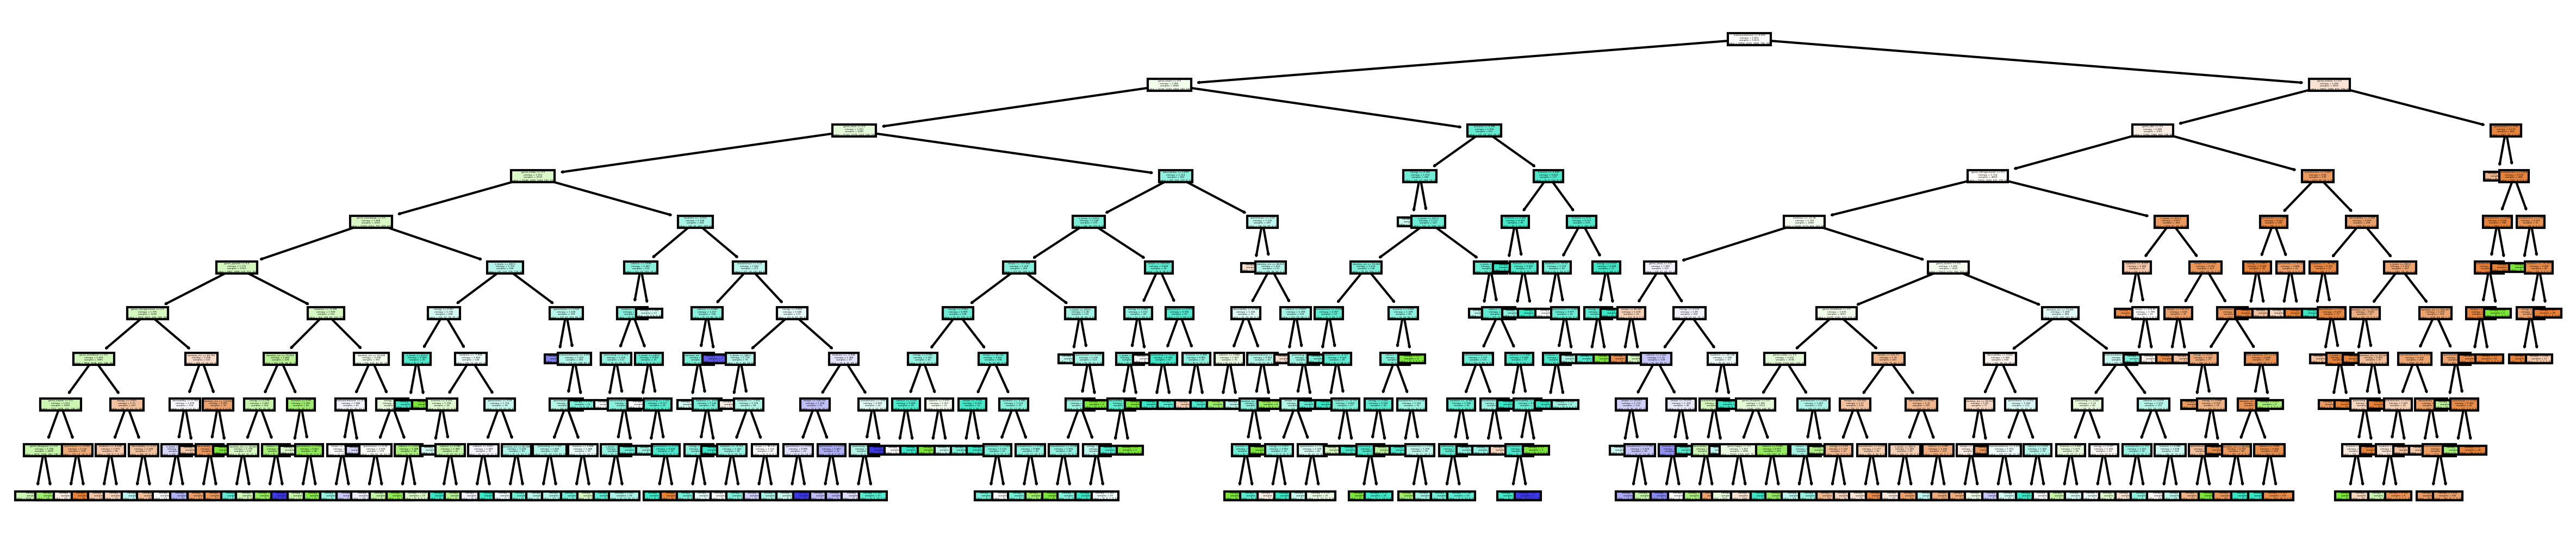

In [251]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42, criterion= "entropy", min_samples_split= 20)
dt.fit(X_train, y_train)
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.show()

In [252]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

Train Accuracy 0.6175888477755787
Train F1-score [0.61589107 0.65185901 0.61452745 0.3926097  0.        ]

Test Accuracy 0.6104611149346181
Test F1-score [0.61307738 0.64615385 0.5978706  0.37419355 0.        ]
              precision    recall  f1-score   support

Intervallo 1       0.75      0.52      0.61       989
Intervallo 2       0.53      0.82      0.65      1026
Intervallo 3       0.67      0.54      0.60       677
Intervallo 4       0.53      0.29      0.37       200
Intervallo 5       0.00      0.00      0.00        14

    accuracy                           0.61      2906
   macro avg       0.50      0.43      0.45      2906
weighted avg       0.64      0.61      0.60      2906

[[511 423  45  10   0]
 [ 94 840  70  22   0]
 [ 59 234 365  19   0]
 [  9  72  61  58   0]
 [  5   5   3   1   0]]
instrumentalness 0.14772218647004698
genre_iranian 0.07905217043743455
genre_indian 0.07057095025646604
genre_brazil 0.06330915897673353
genre_chicago-house 0.06062528044449709
genre_m

C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [253]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42, criterion= "entropy", min_samples_split= 20)
dt.fit(X_train, y_train)
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.show()
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

Train Accuracy 0.6175888477755787
Train F1-score [0.61589107 0.65185901 0.61452745 0.3926097  0.        ]

Test Accuracy 0.6104611149346181
Test F1-score [0.61307738 0.64615385 0.5978706  0.37419355 0.        ]
              precision    recall  f1-score   support

Intervallo 1       0.75      0.52      0.61       989
Intervallo 2       0.53      0.82      0.65      1026
Intervallo 3       0.67      0.54      0.60       677
Intervallo 4       0.53      0.29      0.37       200
Intervallo 5       0.00      0.00      0.00        14

    accuracy                           0.61      2906
   macro avg       0.50      0.43      0.45      2906
weighted avg       0.64      0.61      0.60      2906

[[511 423  45  10   0]
 [ 94 840  70  22   0]
 [ 59 234 365  19   0]
 [  9  72  61  58   0]
 [  5   5   3   1   0]]
instrumentalness 0.14772218647004698
genre_iranian 0.07905217043743455
genre_indian 0.07057095025646604
genre_brazil 0.06330915897673353
genre_chicago-house 0.06062528044449709
genre_m

C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


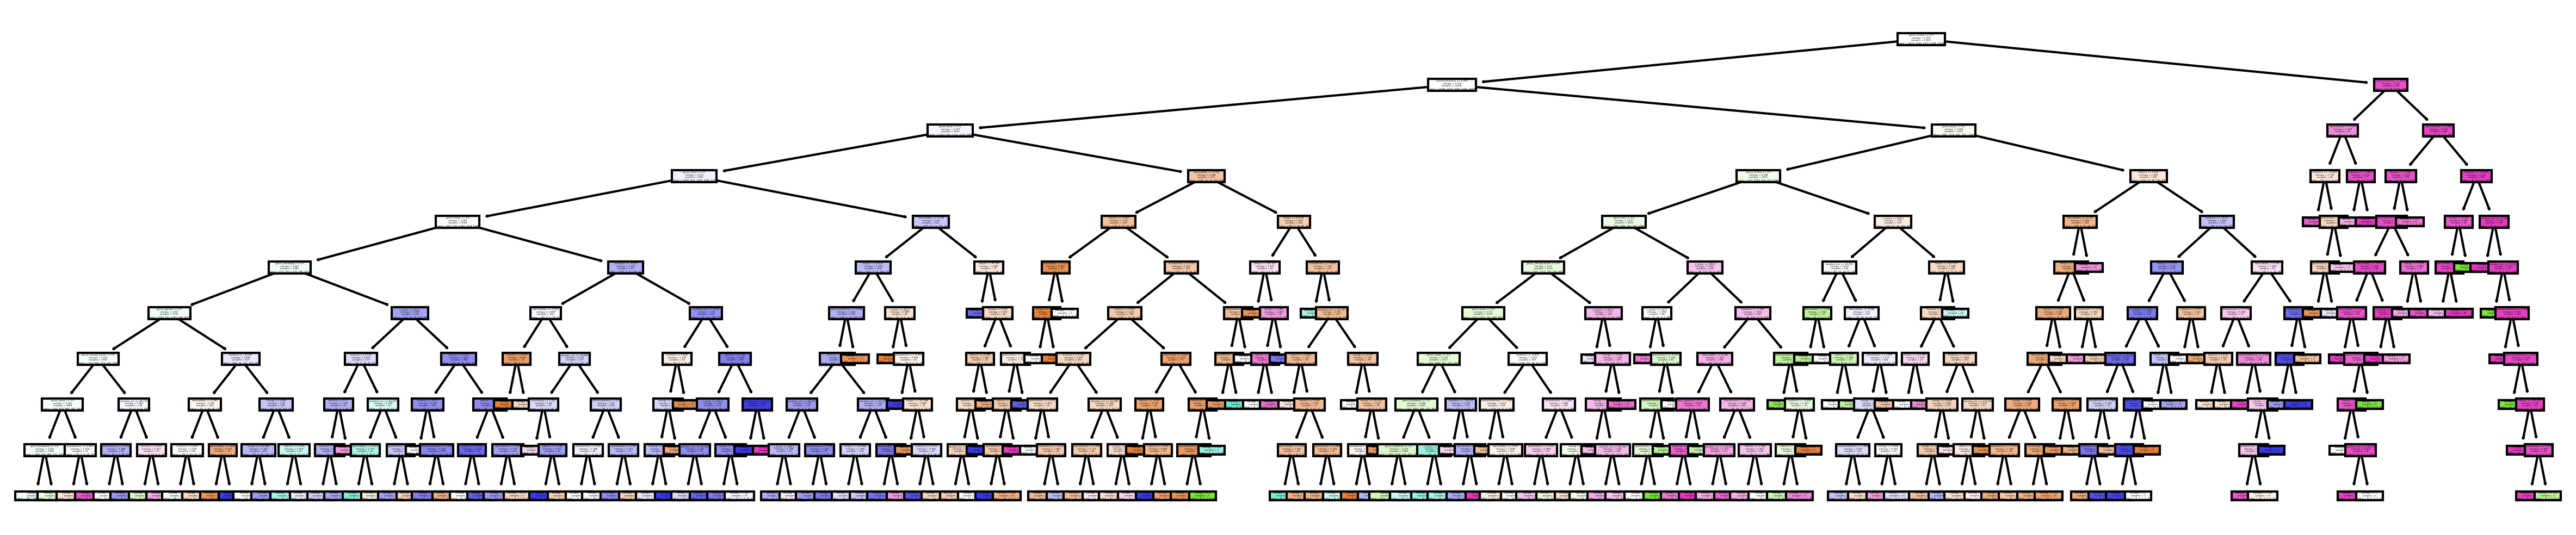

Train Accuracy 0.516220635057224
Train F1-score [0.4833895  0.47117988 0.47148553 0.59907159 0.58727811]

Test Accuracy 0.45251204404679973
Test F1-score [0.41001855 0.43883189 0.43288826 0.47953216 0.51473477]
              precision    recall  f1-score   support

        alto       0.47      0.37      0.41       604
       basso       0.44      0.44      0.44       636
       medio       0.34      0.58      0.43       527
  molto alto       0.52      0.45      0.48       549
 molto basso       0.61      0.44      0.51       590

    accuracy                           0.45      2906
   macro avg       0.48      0.46      0.46      2906
weighted avg       0.48      0.45      0.45      2906

[[221  82 150 118  33]
 [ 36 278 213  25  84]
 [ 53  96 308  47  23]
 [101  49 127 246  26]
 [ 63 126  98  41 262]]


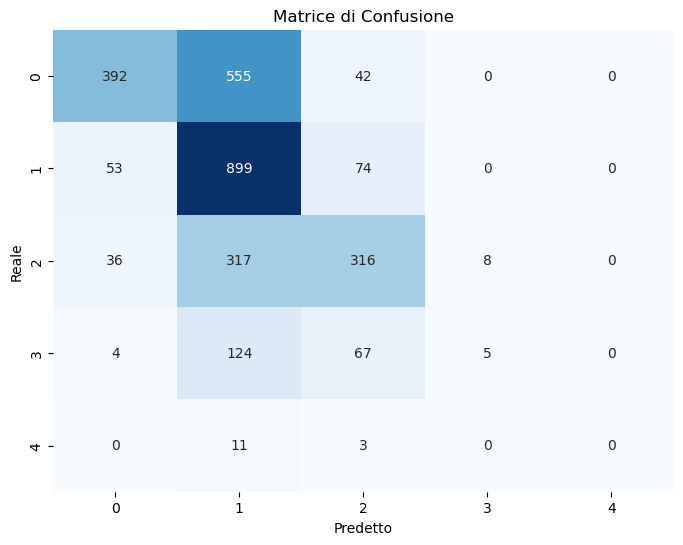

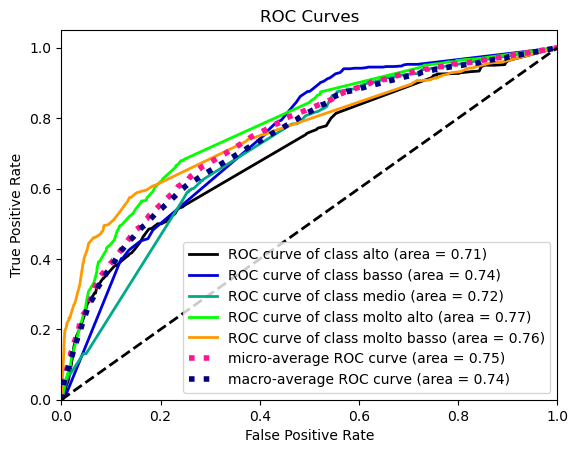

0.7408386870154736
genre_iranian 0.1283276731894024
instrumentalness 0.12220664052363145
genre_indian 0.0686789727754391
genre_sleep 0.06309560655486059
genre_chicago-house 0.048174726970294915
genre_mandopop 0.0451356439088983
genre_forro 0.04158743827149686
genre_brazil 0.041146998388475034
valence 0.03976793862929551
acousticness 0.03560344345738359
danceability 0.03196937161364703
loudness 0.030920458270340272
genre_spanish 0.030617484828440383
genre_techno 0.029034792444142574
duration_ms 0.027973156564739428
genre_idm 0.025886080434970798
speechiness 0.025779834701716874
n_beats 0.025367375980036484
genre_study 0.02450942332125117
liveness 0.02387094273613855
tempo 0.022775019916214195
energy 0.022235831886901723
genre_industrial 0.014564454521017001
genre_bluegrass 0.01329723505395552
genre_breakbeat 0.012943402914271906
processing 0.0035582214088088655
time_signature_5.0 0.0009718307342294656
genre_afrobeat 0.0
genre_black-metal 0.0
genre_disney 0.0
genre_happy 0.0
genre_j-danc

In [264]:
# Libraries and utilities

import math
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pylab as pl
from scikitplot.metrics import plot_roc
from collections import defaultdict
from scipy.stats import pearsonr


import pandas as pd

import os

# Nome del file
file_name = "df_clean.csv"

# Percorso relativo della cartella genitore
cartella_genitore = ".."

# Creazione del percorso completo
percorso_completo = os.path.join(cartella_genitore, file_name)

# Leggi il file CSV
df = pd.read_csv(percorso_completo)

column2drop = ['explicit', 'artists', 'album_name','name']
df.drop(column2drop, axis=1, inplace=True)
df.head()
columns_of_interest = ['duration_ms','genre','acousticness', 'instrumentalness', 'loudness', 'valence', 'danceability', 'energy', 'n_beats','time_signature','popularity','liveness','tempo','processing','speechiness']
 
# Crea un nuovo DataFrame utilizzando solo le colonne di interesse
df = df[columns_of_interest].copy()
# Supponiamo che tu voglia dividere i valori della colonna 'nome_colonna' per 3600
df['duration_ms'] = df['duration_ms'] / 3600
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df, columns=['genre'])
df = pd.get_dummies(df, columns=['time_signature'])
min_value = df['popularity'].min()
max_value = df['popularity'].max()


# Suddividi in 5 bin in base alla frequenza
df['intervalli'] = pd.qcut(df['popularity'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=["molto basso", "basso", "medio", "alto", "molto alto"])


from sklearn.model_selection import train_test_split
attributes = [col for col in df.columns if col not in ['intervalli','popularity']]
X = df[attributes].values
Y = df['intervalli']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42, criterion= "entropy", min_samples_split= 20)
dt.fit(X_train, y_train)
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.show()

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
import seaborn as sns

# Creazione del grafico della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()

plot_roc(y_test, dt.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, dt.predict_proba(X_test), multi_class="ovr", average="macro"))

zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

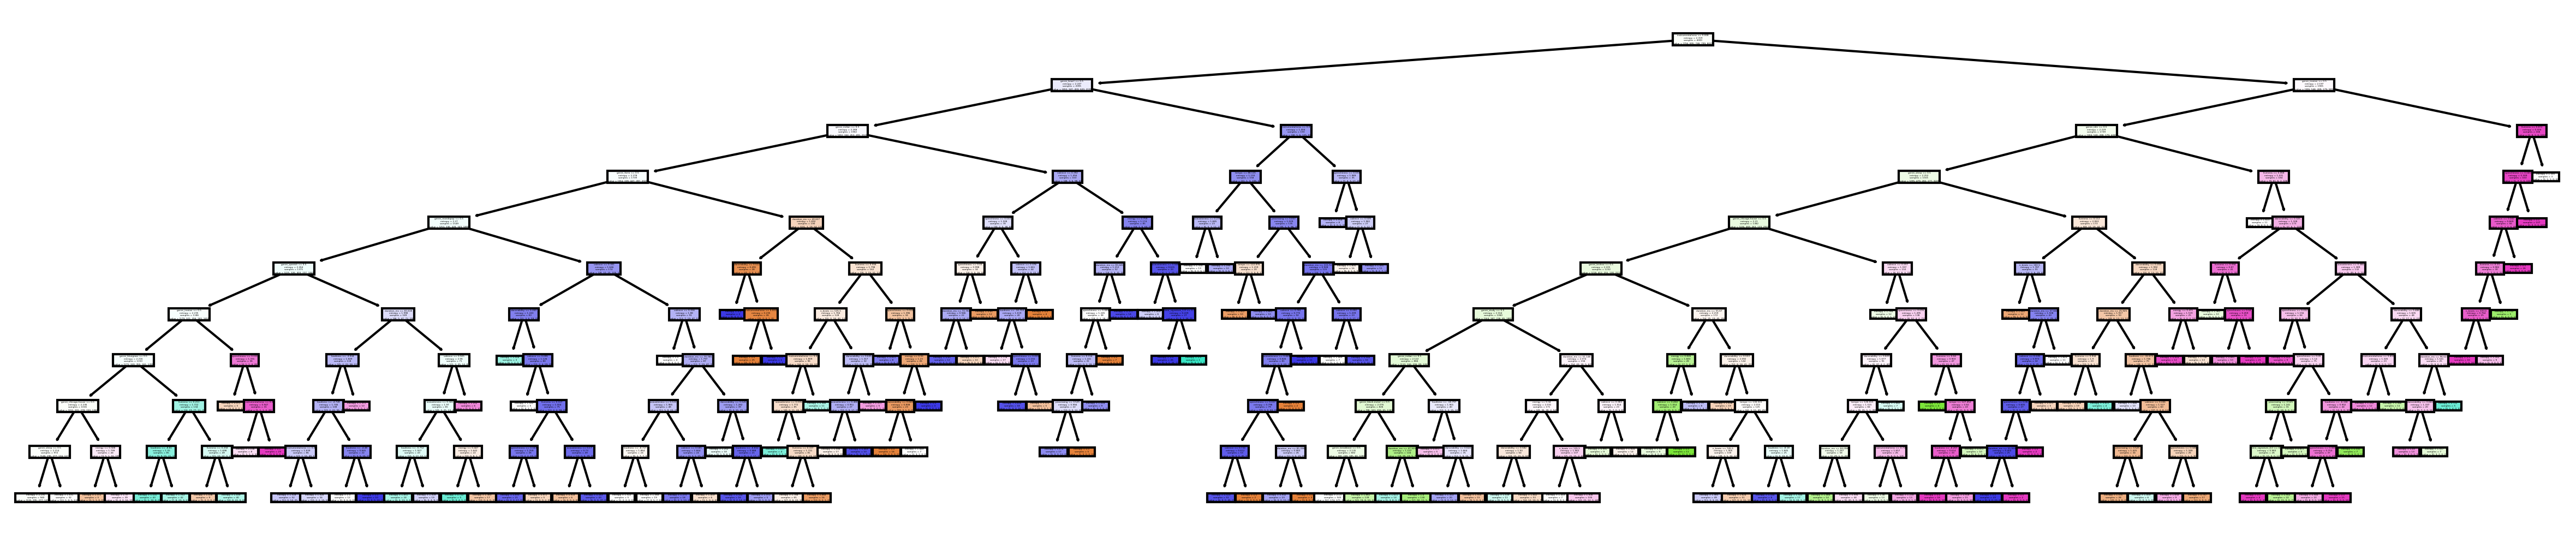

Train Accuracy 0.52875
Train F1-score [0.51814224 0.49247121 0.43212237 0.6152748  0.61979914]

Test Accuracy 0.419
Test F1-score [0.32335329 0.43399638 0.36138614 0.47727273 0.4929972 ]
              precision    recall  f1-score   support

        alto       0.37      0.29      0.32       189
       basso       0.36      0.54      0.43       224
       medio       0.34      0.39      0.36       187
  molto alto       0.55      0.42      0.48       200
 molto basso       0.56      0.44      0.49       200

    accuracy                           0.42      1000
   macro avg       0.44      0.41      0.42      1000
weighted avg       0.44      0.42      0.42      1000

[[ 54  37  30  47  21]
 [ 11 120  61   4  28]
 [ 18  82  73   6   8]
 [ 38  44  22  84  12]
 [ 24  46  31  11  88]]


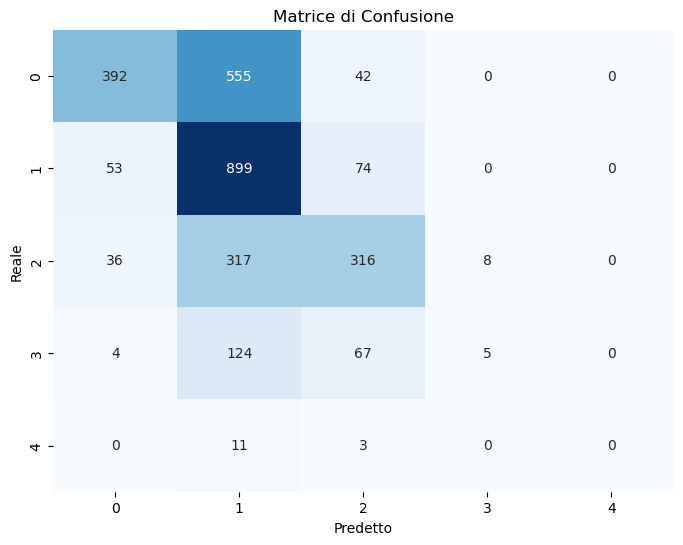

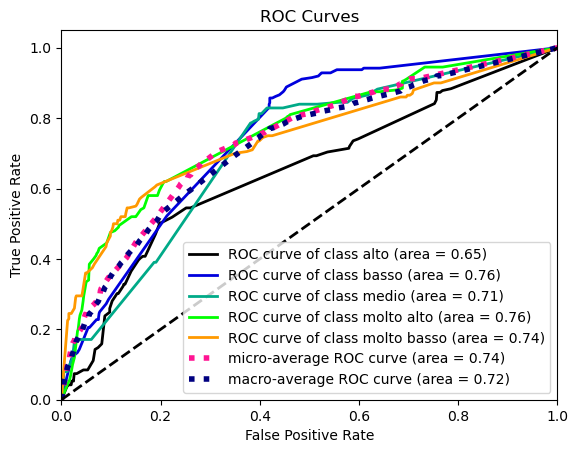

0.7247720895638127
instrumentalness 0.14381373038956669
genre_iranian 0.09286189389332095
duration_ms 0.057873779398778386
genre_indian 0.05133767295346289
valence 0.04981731938967198
liveness 0.047262110562133655
speechiness 0.04534730482794502
danceability 0.04177551012216441
genre_sleep 0.04147731399765373
loudness 0.04104846928196078
genre_forro 0.03944791404325224
genre_brazil 0.038356542346588814
genre_mandopop 0.036907735789692864
genre_chicago-house 0.03646605476061382
genre_idm 0.03494147843964483
energy 0.028887796654890857
genre_spanish 0.026874104698868646
genre_techno 0.020521314502061256
acousticness 0.02020205445250859
n_beats 0.019687066847591812
genre_study 0.01712070438495351
tempo 0.01496564045732148
genre_bluegrass 0.014451070723350688
genre_breakbeat 0.01290853745072542
genre_black-metal 0.011786051413438726
processing 0.01010172377038521
time_signature_1.0 0.0019537793594383407
time_signature_4.0 0.00180532508801438
genre_afrobeat 0.0
genre_disney 0.0
genre_happy 

In [265]:
# Libraries and utilities

import math
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pylab as pl
from scikitplot.metrics import plot_roc
from collections import defaultdict
from scipy.stats import pearsonr


import pandas as pd

import os

# Nome del file
file_name = "test.csv"

# Percorso relativo della cartella genitore
cartella_genitore = ".."

# Creazione del percorso completo
percorso_completo = os.path.join(cartella_genitore, file_name)

# Leggi il file CSV
df = pd.read_csv(percorso_completo)

column2drop = ['explicit', 'artists', 'album_name','name']
df.drop(column2drop, axis=1, inplace=True)
df.head()
columns_of_interest = ['duration_ms','genre','acousticness', 'instrumentalness', 'loudness', 'valence', 'danceability', 'energy', 'n_beats','time_signature','popularity','liveness','tempo','processing','speechiness']
 
# Crea un nuovo DataFrame utilizzando solo le colonne di interesse
df = df[columns_of_interest].copy()
# Supponiamo che tu voglia dividere i valori della colonna 'nome_colonna' per 3600
df['duration_ms'] = df['duration_ms'] / 3600
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df, columns=['genre'])
df = pd.get_dummies(df, columns=['time_signature'])
min_value = df['popularity'].min()
max_value = df['popularity'].max()


# Suddividi in 5 bin in base alla frequenza
df['intervalli'] = pd.qcut(df['popularity'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=["molto basso", "basso", "medio", "alto", "molto alto"])


from sklearn.model_selection import train_test_split
attributes = [col for col in df.columns if col not in ['intervalli','popularity']]
X = df[attributes].values
Y = df['intervalli']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42, criterion= "entropy", min_samples_split= 20)
dt.fit(X_train, y_train)
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.show()

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
import seaborn as sns

# Creazione del grafico della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()
plot_roc(y_test, dt.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, dt.predict_proba(X_test), multi_class="ovr", average="macro"))

zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)